In [395]:
import numpy as ny
import pandas as ps
import matplotlib.pyplot as ml
import seaborn as sb
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,classification_report,recall_score
from sklearn.model_selection import cross_validate,cross_val_score

In [396]:
# Below Data Understading purpose
# Data with Scaling and Dropping unnecessary Features
# x,y = Traning Data ; a,b = test Data
# Data with Scaling and without Dropping unnecessary Features
# u,v = Traning Data ; j,k = test Data
# Data without Scaling and without Dropping unnecessary Features
# m,n = Traning Data ; f,g = test Data

# Previous Preprocessing

In [397]:
# DROP UNIVARIANCE CLOUMNS
DF=ps.read_csv(r"C:\Users\ShinChan\Downloads\HR_Employee_Attrition_Data.csv")
Drp=[]
for i in DF.columns:
    if DF[i].nunique() == 1 or DF[i].nunique() == len(DF):
        Drp.append(i)
        
DF.drop(Drp,inplace=True,axis=1)

In [398]:
# DROP CORELATED COLUMNS
DF.drop(columns=["MonthlyIncome","PercentSalaryHike"],inplace=True,axis=1)

In [399]:
# Z SCORE or standardization and without Dropping Features and Rows
SD=ps.DataFrame(stats.zscore(DF.select_dtypes(include="int64")),columns=DF.select_dtypes(include="int64").columns)
for i in SD.columns:
    DF[i]=SD[i]
for i in SD.columns:
    for j in DF.index:
        if (SD.loc[j,i]>3) or (SD.loc[j,i]<-3):
            DF.drop(index=[j],axis=0,inplace=True)
            

# Decision Tree

In [400]:
print(DF.Age.skew())
DF.Age.kurt()

0.4720243857115618


-0.23239714372048859

In [401]:
from sklearn.tree import DecisionTreeClassifier

In [402]:
LD=DF.select_dtypes(include="object")
for i in DF.select_dtypes(include="object").columns:
    DF[i]=LabelEncoder().fit_transform(LD[i])

In [403]:
X=DF.drop(columns=["Attrition"],axis=1)
Y=DF.Attrition
x,a,y,b=train_test_split(X,Y,test_size=0.2,random_state=7)

In [471]:
DT=DecisionTreeClassifier().fit(x,y)

In [472]:
b1=DT.predict(a)

In [473]:
accuracy_score(b,b1)

0.9351351351351351

In [475]:
print(classification_report(b,b1))
confusion_matrix(b,b1)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       467
           1       0.81      0.77      0.79        88

    accuracy                           0.94       555
   macro avg       0.88      0.87      0.88       555
weighted avg       0.93      0.94      0.93       555



array([[451,  16],
       [ 20,  68]], dtype=int64)

# Partial preprocessing Data

In [408]:
# Z SCORE or standardization and without Dropping Features
DD=ps.read_csv(r"C:\Users\ShinChan\Downloads\HR_Employee_Attrition_Data.csv")
SD=ps.DataFrame(stats.zscore(DF.select_dtypes(include="int64")),columns=DF.select_dtypes(include="int64").columns)
for i in SD.columns:
    DD[i]=SD[i]

In [409]:
LD=DD.select_dtypes(include="object")
for i in DD.select_dtypes(include="object").columns:
    DD[i]=LabelEncoder().fit_transform(LD[i])

In [410]:
U=DD.drop(columns=["Attrition"])
V=DD.Attrition
u,j,v,k=train_test_split(U,V,random_state=3,test_size=0.2)

In [411]:
DT1=DecisionTreeClassifier().fit(u,v)

In [412]:
k1=DT1.predict(j)
accuracy_score(k,k1)

0.9642857142857143

In [413]:
print(classification_report(k,k1))
confusion_matrix(k,k1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       491
           1       0.90      0.89      0.89        97

    accuracy                           0.96       588
   macro avg       0.94      0.93      0.93       588
weighted avg       0.96      0.96      0.96       588



array([[481,  10],
       [ 11,  86]], dtype=int64)

# DT Without preprocessing

In [362]:
DA=ps.read_csv(r"C:\Users\ShinChan\Downloads\HR_Employee_Attrition_Data.csv")
LD=DA.select_dtypes(include="object")
for i in DA.select_dtypes(include="object").columns:
    DA[i]=LabelEncoder().fit_transform(LD[i])
M=DA.drop(columns=["Attrition"])
N=DA.Attrition
m,f,n,g=train_test_split(M,N,random_state=6,test_size=0.2)

In [363]:
DT2=DecisionTreeClassifier().fit(m,n)

In [364]:
g1=DT2.predict(f)
accuracy_score(g,g1)

0.9523809523809523

In [365]:
print(classification_report(g,g1))
confusion_matrix(g,g1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       487
           1       0.89      0.82      0.86       101

    accuracy                           0.95       588
   macro avg       0.93      0.90      0.91       588
weighted avg       0.95      0.95      0.95       588



array([[477,  10],
       [ 18,  83]], dtype=int64)

# DT with GridSeachCV Parameters

In [371]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [372]:
Dic={'max_depth':[1,2,3],'min_samples_leaf':[100,200,300],'random_state':[5,6,7],'criterion':['gini','entropy']}

In [373]:
CV=GridSearchCV(DecisionTreeClassifier(),n_jobs=3,param_grid=Dic,cv=10)

In [374]:
CV1=CV.fit(x,y)
CV1.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 100,
 'random_state': 5}

In [377]:
CM=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=100,random_state=5)
CM=CM.fit(x,y)
b2=CM.predict(a)

# Area Under Curve

In [378]:
c=DT.predict_proba(a)[:,1]
fpt,tpr,_=roc_curve(b,c)
print(roc_auc_score(b,b2))
print('accu =',accuracy_score(b,b1))
auc(fpt,tpr)

0.6053995522678607
accu = 0.9423423423423424


0.8735156706248784

Text(0, 0.5, 'True Pastive Rate')

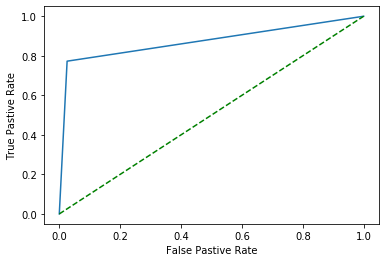

In [379]:
ml.plot(fpt,tpr)
ml.plot([0,1],[0,1],linestyle="--",color='g')
ml.xlabel("False Pastive Rate")
ml.ylabel("True Pastive Rate")

# DT Plot

In [380]:
from sklearn.tree import plot_tree

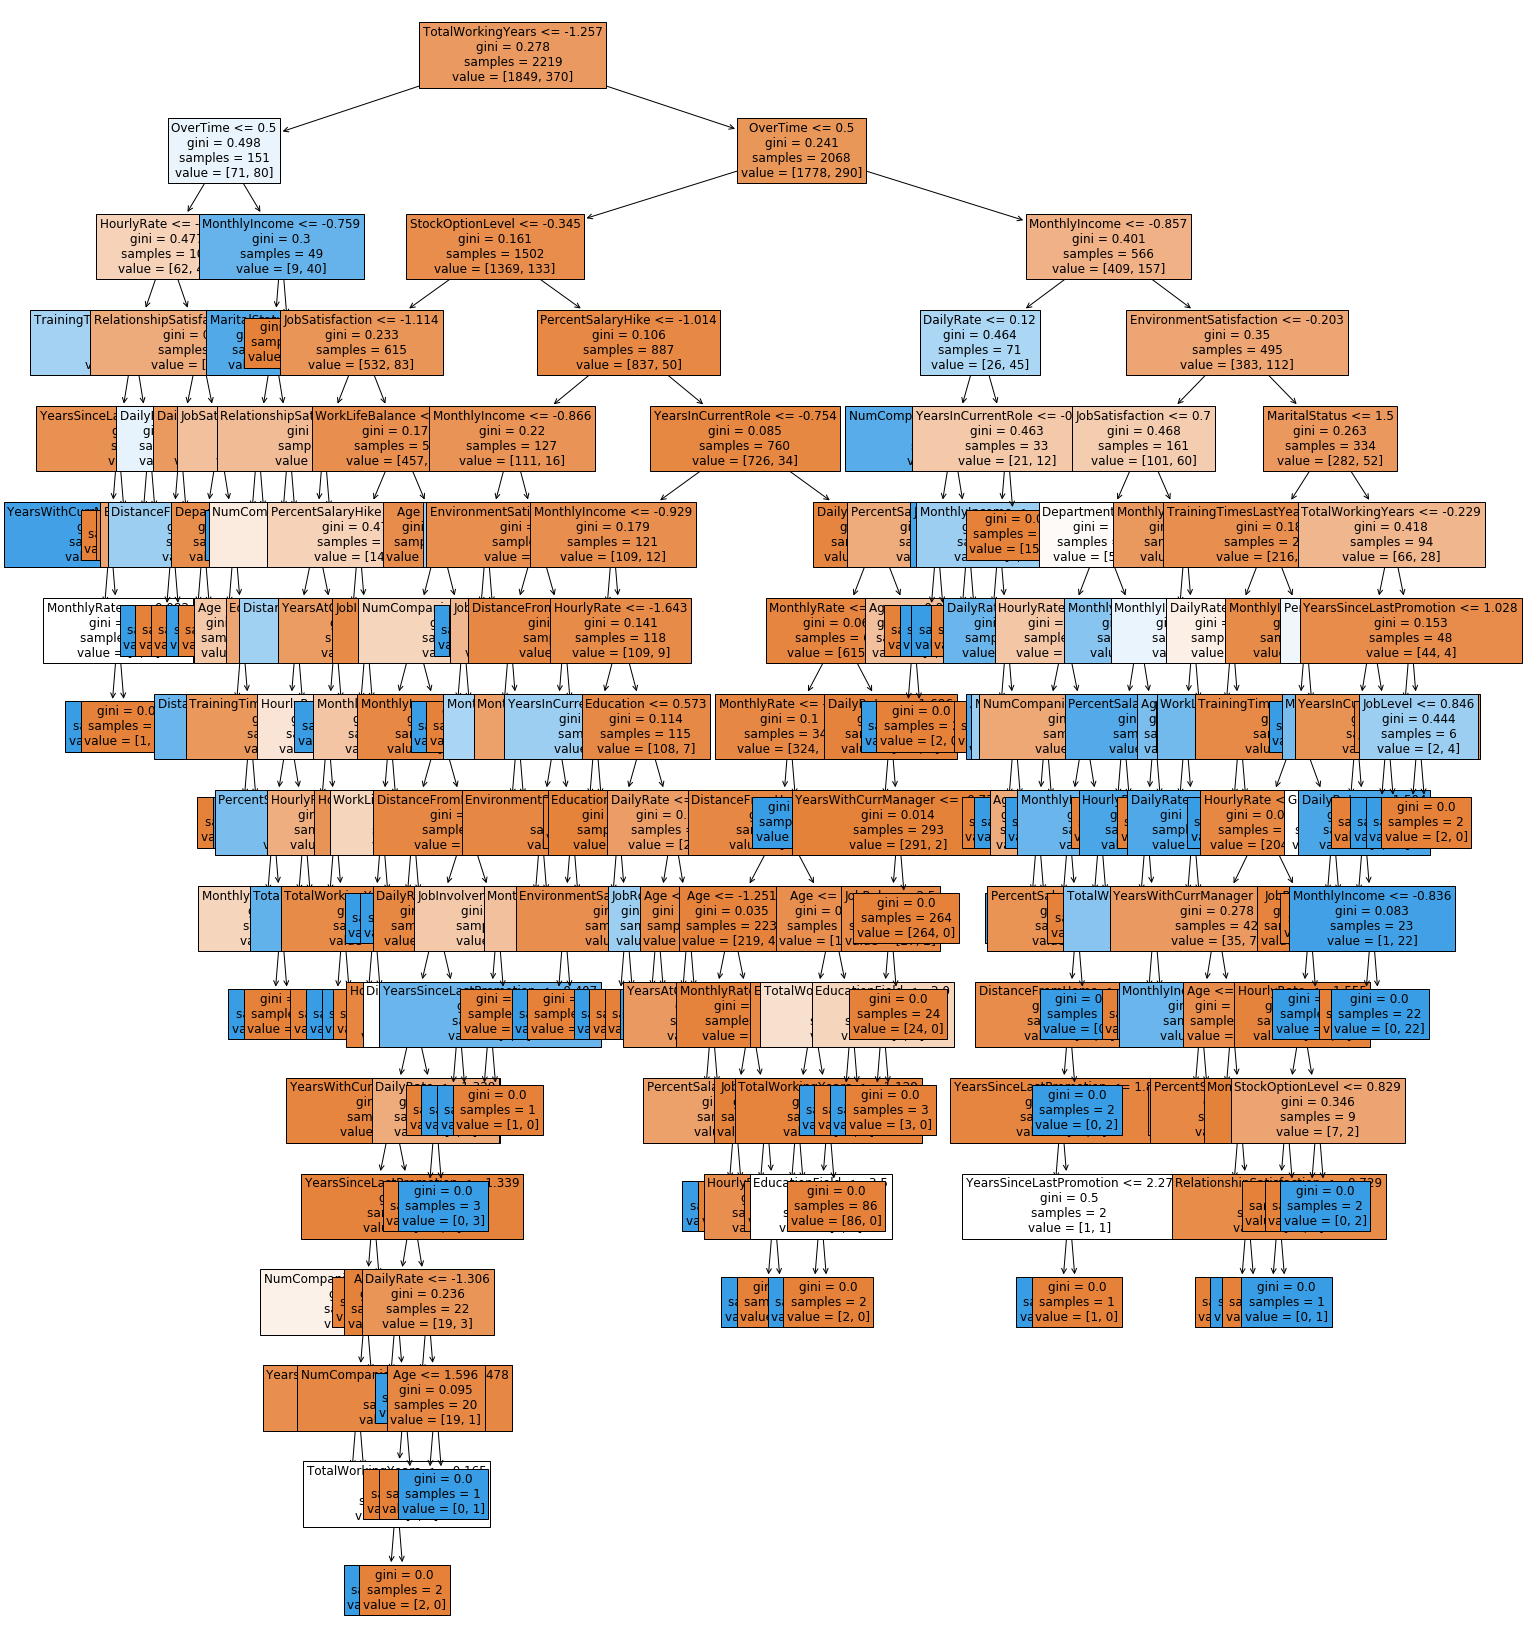

In [381]:
ml.figure(figsize=(24,30))
plot_tree(DT,feature_names=a.columns,fontsize=12,filled=True)
ml.show()

# Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
RF=RandomForestClassifier()

In [384]:
dc={'max_features':['auto','sqrt','log2'],'n_estimators':["warn",50,40,90],'criterion':['gini','entropy'],
    'random_state':[7,20,40],'max_depth':[1,3,6],'min_samples_leaf':[100,200,300]}

# RF with Preprocessnig Data

In [237]:
# Took more time so Dont Run
# CVR=GridSearchCV(RF,cv=10,n_jobs=3,param_grid=dc)
# RF=CVR.fit(x,y)

In [67]:
RF.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 100,
 'n_estimators': 'warn',
 'random_state': 7}

In [238]:
RF=RandomForestClassifier(criterion='gini',max_depth=1,max_features='auto',min_samples_leaf=100,n_estimators='warn',random_state=7).fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [239]:
def Performance(Model,X_test,Y_test):
    y = Model.predict(X_test)
    y_prob = Model.predict_proba(X_test)[:,1]
    fpr,tpr,Dummy = roc_curve(Y_test,y_prob)
    ml.figure(figsize=(16,4))
    ml.plot(fpr,tpr)
    ml.plot([0,1],[0,1],linestyle="--",color='r')
    ml.xlabel("False Pastive Rate")
    ml.ylabel("True Pastive Rate")
    print('ROC = ' ,roc_auc_score(Y_test,y))
    print('Accuracy = ',accuracy_score(Y_test,y))
    ml.show()

ROC =  0.5
Accuracy =  0.826530612244898


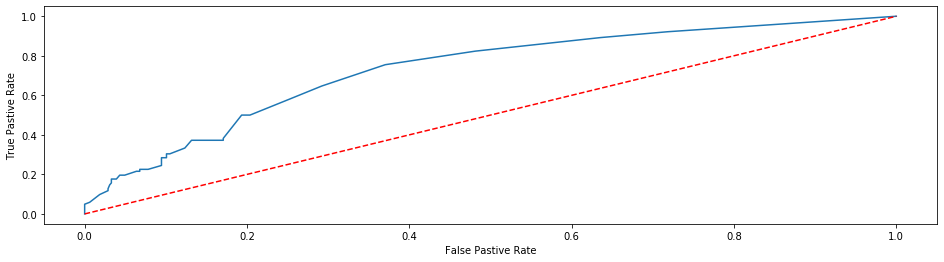

In [240]:
Performance(RF,a,b)

# RF Without GridSearchCV

ROC =  0.8820809811173838
Accuracy =  0.9567567567567568


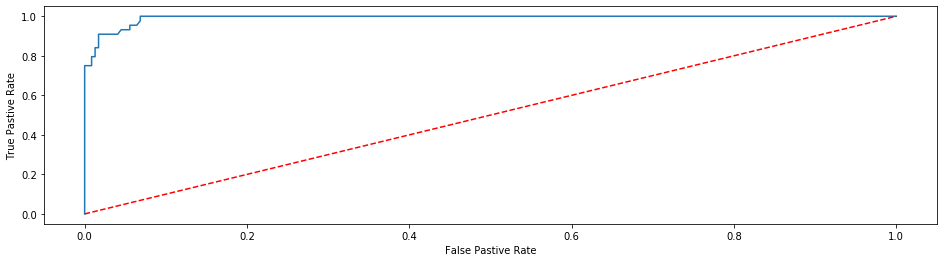

In [458]:
RF1=RandomForestClassifier(n_estimators=300).fit(x,y)
Performance(RF1,a,b)

In [454]:
def Summary(Model,X_test,Y_test):
    y = Model.predict(X_test)
    print("classification_report","\n",classification_report(Y_test,y))
    print("confusion_matrix","\n",confusion_matrix(Y_test,y))
    ml.figure(figsize=(12,4))
    sb.heatmap(confusion_matrix(Y_test,y),annot=True)
    ml.figure(figsize=(24,8))
    if type(Model) is type(DecisionTreeClassifier()):
        plot_tree(Model,filled=True,fontsize=10,feature_names=X_test.columns)
    elif type(Model) is type(RandomForestClassifier()):
        plot_tree(Model[1],filled=True,fontsize=10,feature_names=X_test.columns)
    ml.show() 

classification_report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       467
           1       0.94      0.77      0.85        88

    accuracy                           0.96       555
   macro avg       0.95      0.88      0.91       555
weighted avg       0.96      0.96      0.95       555

confusion_matrix 
 [[463   4]
 [ 20  68]]


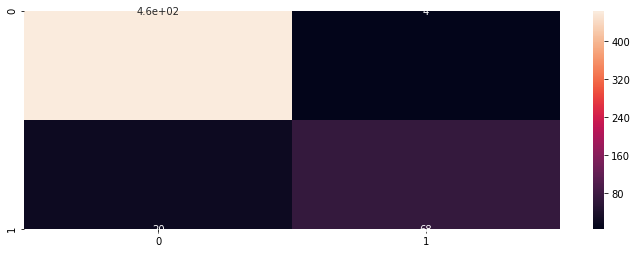

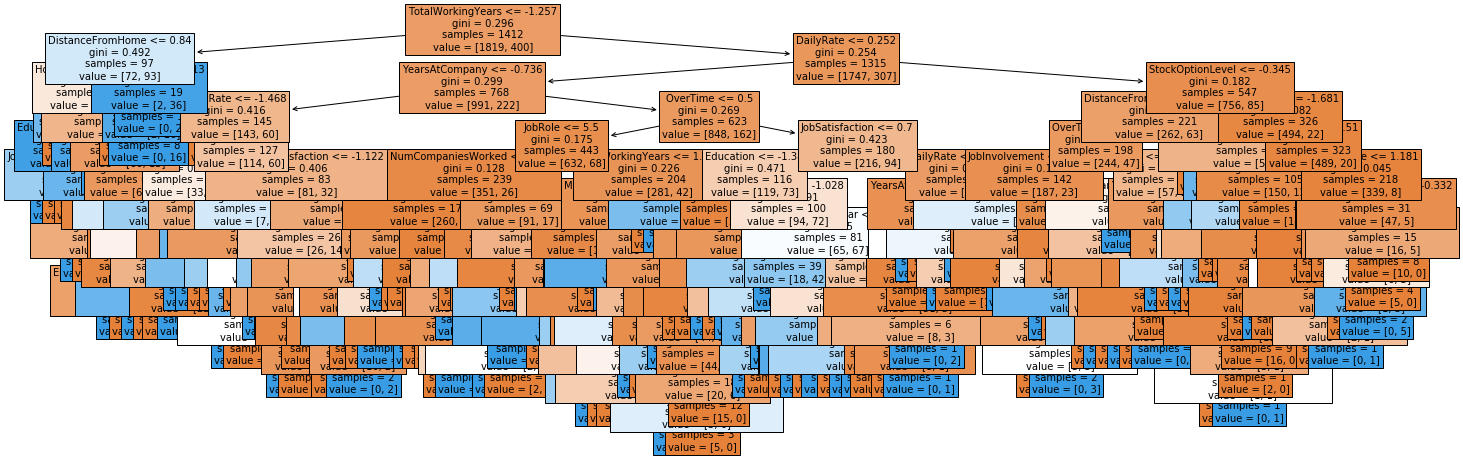

sklearn.ensemble.forest.RandomForestClassifier

In [455]:
Summary(RF1,a,b)
RandomForestClassifier

In [456]:
# Number of Trees in Forest
len(RF1)

300

# RF with Standardization Data

ROC =  0.915489113318076
Accuracy =  0.9693877551020408


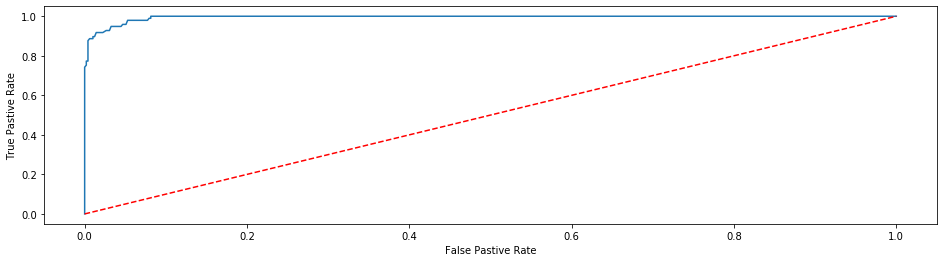

classification_report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       491
           1       0.98      0.84      0.90        97

    accuracy                           0.97       588
   macro avg       0.97      0.92      0.94       588
weighted avg       0.97      0.97      0.97       588

confusion_matrix 
 [[489   2]
 [ 16  81]]


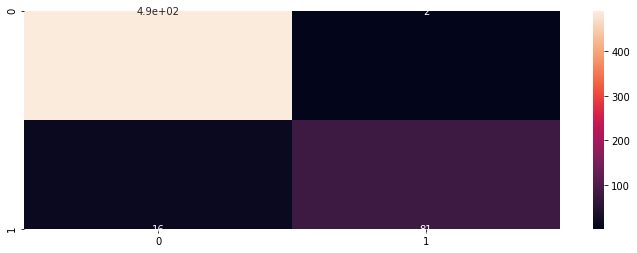

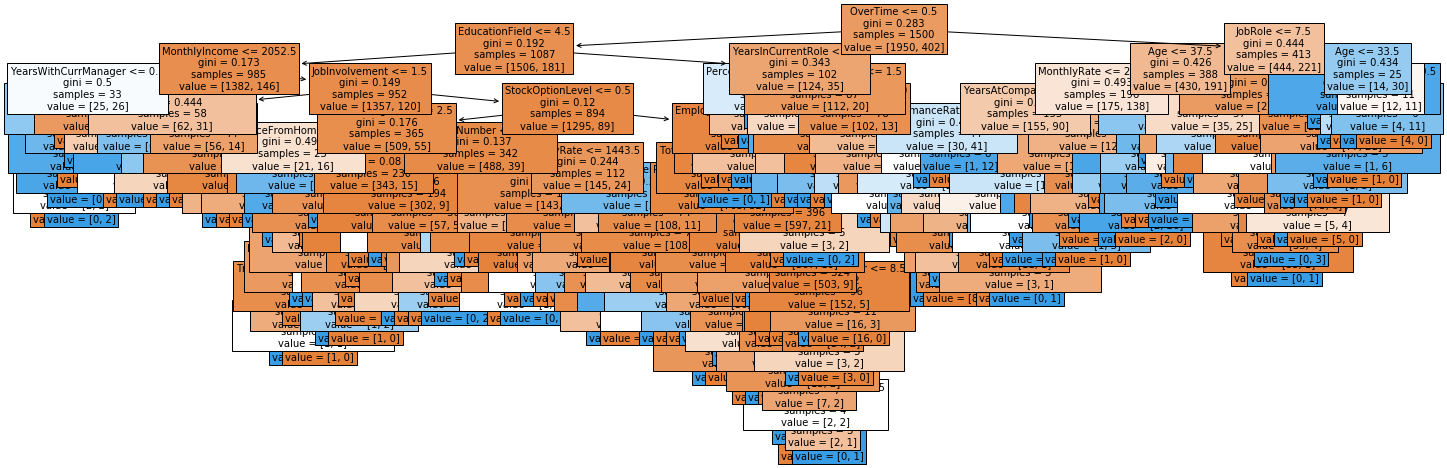

In [460]:
RF2=RandomForestClassifier(n_estimators=200).fit(u,v)
Performance(RF2,j,k)
Summary(RF2,j,k)

# RF Without preprocessing

ROC =  0.9028605119238824
Accuracy =  0.9625850340136054


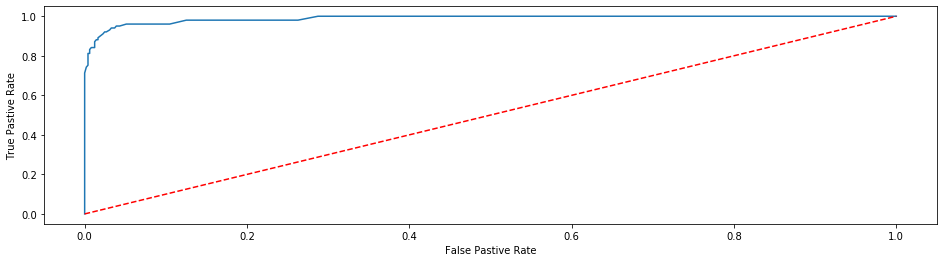

classification_report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       487
           1       0.96      0.81      0.88       101

    accuracy                           0.96       588
   macro avg       0.96      0.90      0.93       588
weighted avg       0.96      0.96      0.96       588

confusion_matrix 
 [[484   3]
 [ 19  82]]


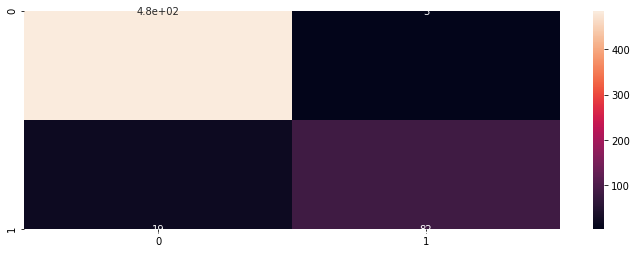

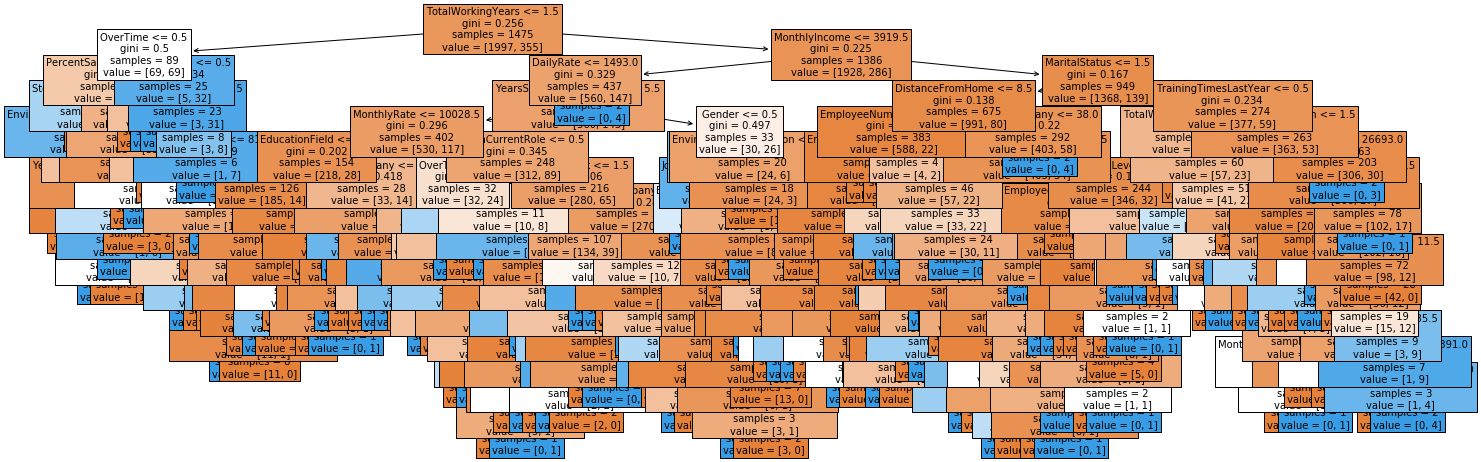

In [465]:
RF3=RandomForestClassifier(n_estimators=100).fit(m,n)
Performance(RF3,f,g)
Summary(RF3,f,g)

### Inter Check for Analysis

### Standardization model with Non Standardization DATA

In [445]:
# NB with Dropping unnecessary Features 
DP=ps.read_csv(r"C:\Users\ShinChan\Downloads\HR_Employee_Attrition_Data.csv")
DR=DP.drop(columns=["Attrition",'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',"MonthlyIncome","PercentSalaryHike"],axis=1)
LD=DP.select_dtypes(include="object")
for i in DR.select_dtypes(include="object").columns:
    DR[i]=LabelEncoder().fit_transform(LD[i])
q,s,r,t=train_test_split(DR,LabelEncoder().fit_transform(DP.Attrition),random_state=6,test_size=0.2)


classification_report 
               precision    recall  f1-score   support

           0       0.85      0.59      0.70      1979
           1       0.17      0.43      0.24       373

    accuracy                           0.57      2352
   macro avg       0.51      0.51      0.47      2352
weighted avg       0.74      0.57      0.63      2352

confusion_matrix 
 [[1177  802]
 [ 214  159]]


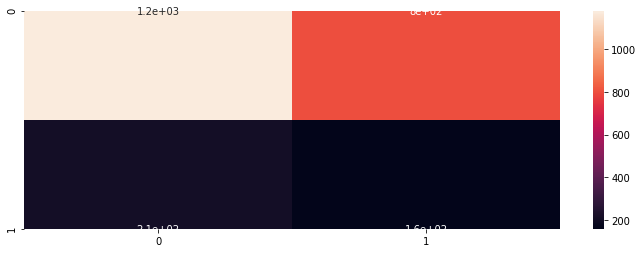

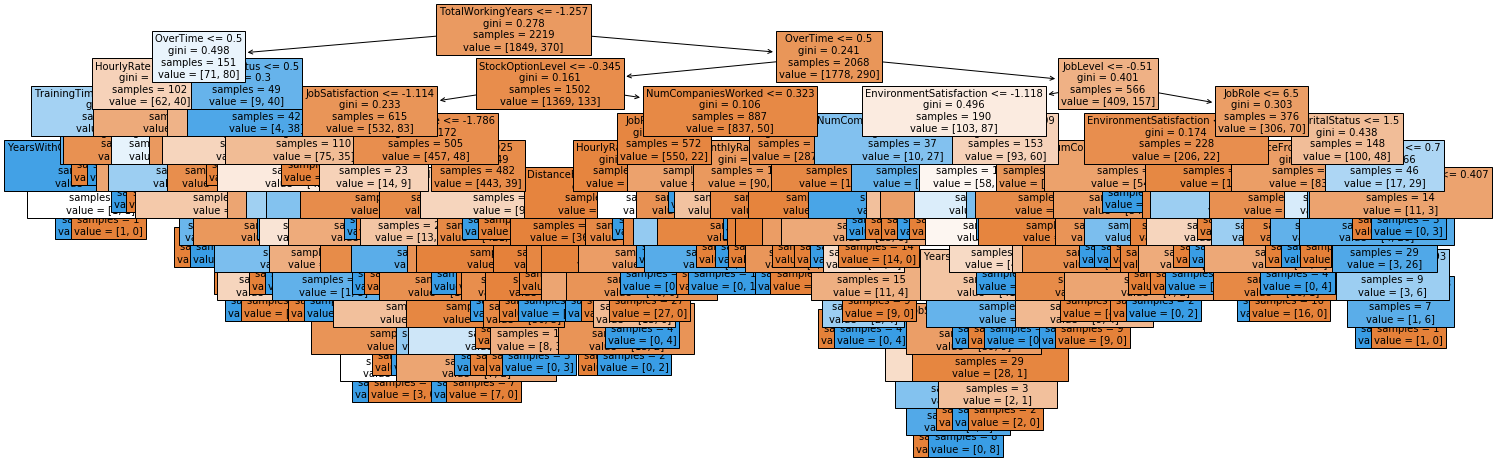

ROC =  0.5105091395307566
Accuracy =  0.5680272108843537


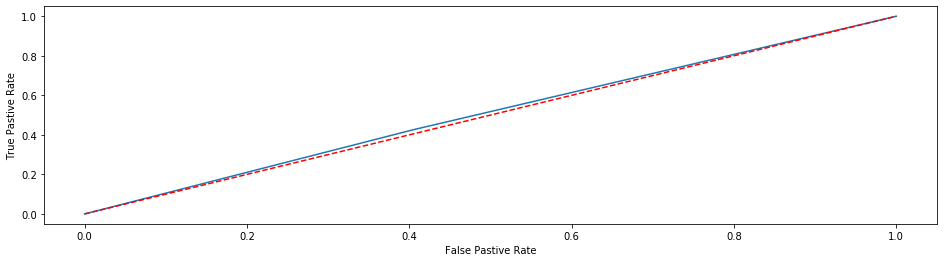

In [489]:
Summary(DT,q,r)
Performance(DT,q,r)

ROC =  0.5
Accuracy =  0.8414115646258503


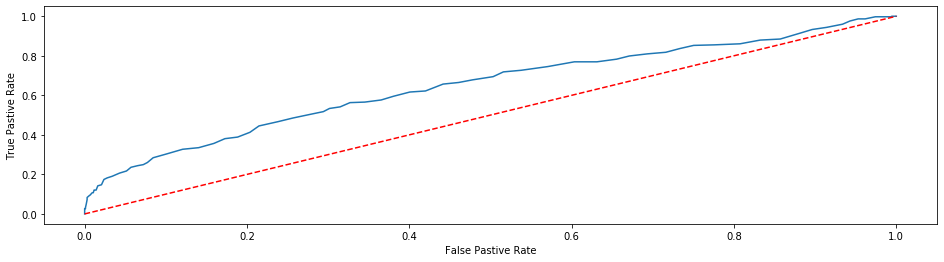

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1979
           1       0.00      0.00      0.00       373

    accuracy                           0.84      2352
   macro avg       0.42      0.50      0.46      2352
weighted avg       0.71      0.84      0.77      2352

confusion_matrix 
 [[1979    0]
 [ 373    0]]


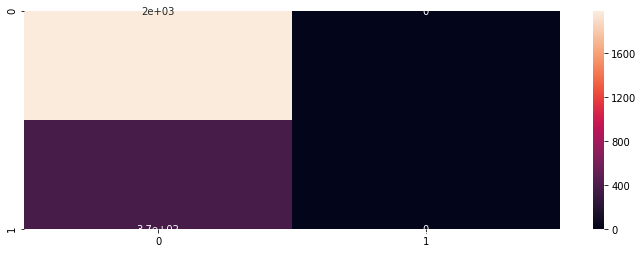

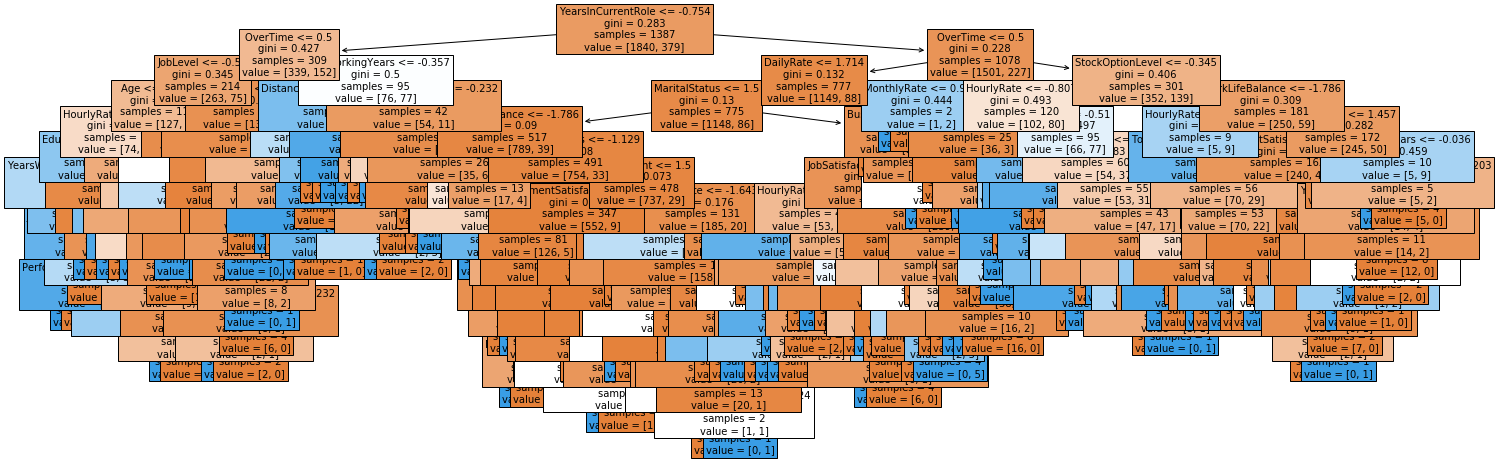

In [493]:
Performance(RF1,q,r)
Summary(RF1,q,r)

### Non Standardization model with Standardization DATA

ROC =  0.9756209918409832
Accuracy =  0.9914965986394558


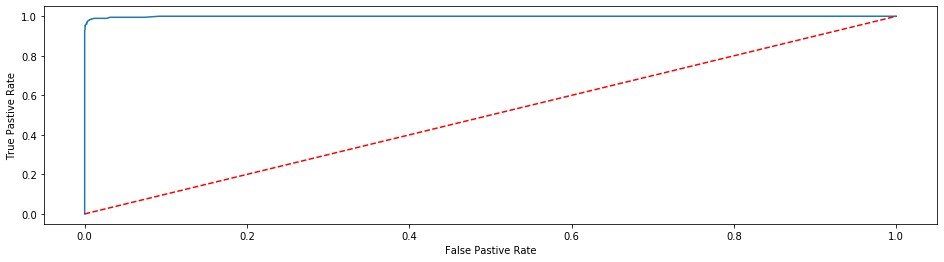

In [490]:
Performance(RF3,u,v)

ROC =  0.9738488399422489
Accuracy =  0.9885204081632653


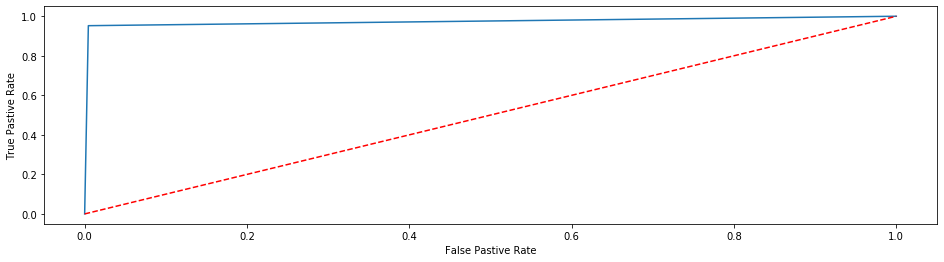

classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1975
           1       0.98      0.95      0.96       377

    accuracy                           0.99      2352
   macro avg       0.98      0.97      0.98      2352
weighted avg       0.99      0.99      0.99      2352

confusion_matrix 
 [[1966    9]
 [  18  359]]


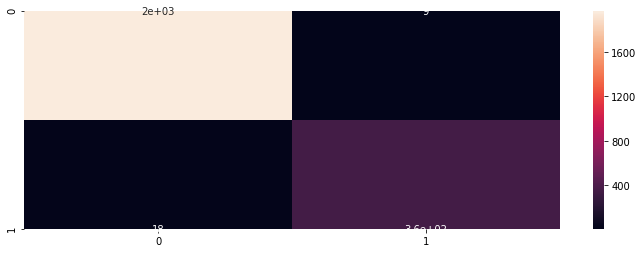

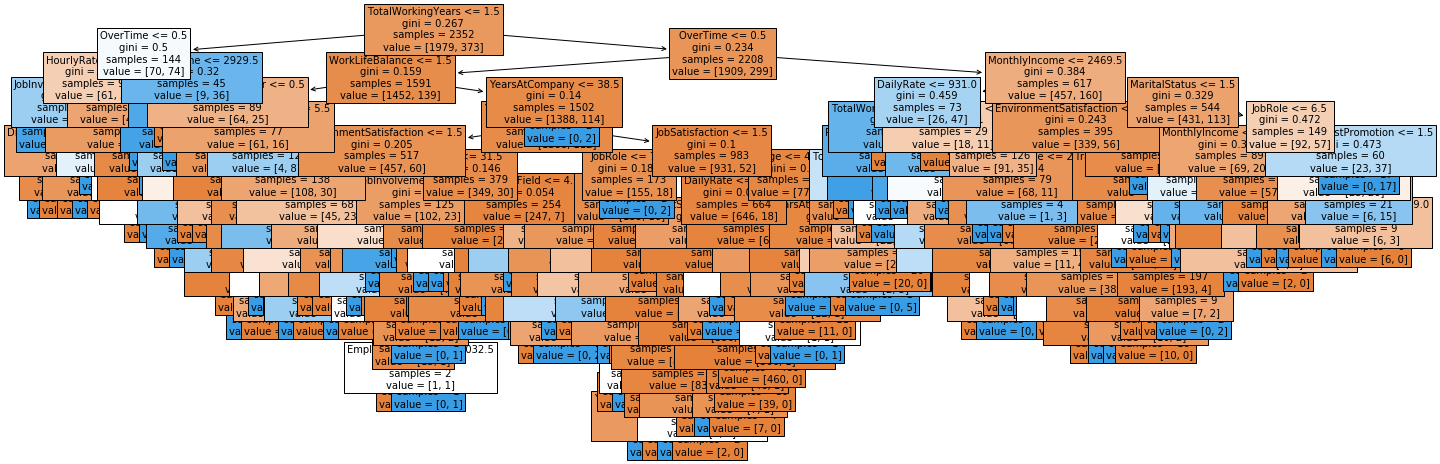

In [488]:
Performance(DT2,u,v)
Summary(DT2,u,v)

                                   ...... To Be Continued ......